# Carga de los Datos para el modelo Naive Bayes

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
import plotly.graph_objects as go

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
ruta = r'C:\MachineLearning\Dataset\TornadosDataset\tornados.csv.zip'  
df = pd.read_csv(ruta) 

## Modelo Naive Bayes 

In [3]:
df_ml = df.copy()

In [4]:
# Crear una copia del DataFrame original para el preprocesamiento
df_ml = df.copy()

# Eliminar columnas que no aportan valor predictivo o son redundantes
df_ml.drop(['om', 'date', 'time', 'datetime_utc', 'stf', 'fat', 'f1', 'f2', 'f3', 'f4'], axis=1, inplace=True)

# Eliminar filas con valores nulos
df_ml.dropna(inplace=True)

# Asegurar que 'fc' esté en formato numérico
df_ml['fc'] = df_ml['fc'].astype(int)

# Convertir variables categóricas en variables dummy, eliminando la primera columna de cada una
cat_columns = ['st', 'tz']
df_ml = pd.get_dummies(df_ml, columns=cat_columns, drop_first=True)

# Reemplazar valores booleanos por 0 y 1 si quedan
df_ml.replace({False: 0, True: 1}, inplace=True)

# Verificación final
print("Forma final del DataFrame para ML:", df_ml.shape)
print("Primeras filas del DataFrame preprocesado:")
df_ml.head()

Forma final del DataFrame para ML: (41517, 68)
Primeras filas del DataFrame preprocesado:


,yr,mo,dy,mag,inj,loss,slat,slon,elat,elon,...,st_TX,st_UT,st_VA,st_VT,st_WA,st_WI,st_WV,st_WY,tz_America/Denver,tz_UTC
0,1950,10,1,1.0,0,50000.0,36.73,-102.52,36.88,-102.3,...,0,0,0,0,0,0,0,0,0,0
1,1950,10,9,3.0,3,500000.0,34.17,-78.60,0.00,0.0,...,0,0,0,0,0,0,0,0,0,0
2,1950,11,20,2.0,0,500000.0,37.37,-87.20,0.00,0.0,...,0,0,0,0,0,0,0,0,0,0
3,1950,11,20,1.0,0,500000.0,38.20,-84.50,0.00,0.0,...,0,0,0,0,0,0,0,0,0,0
4,1950,11,20,1.0,3,50000.0,32.42,-89.13,0.00,0.0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# Separar variables predictoras (X) y variable objetivo (y)
X = df_ml.drop('mortality', axis=1)
y = df_ml['mortality']

KeyError: "['mortality'] not found in axis"

In [ ]:
from sklearn.model_selection import train_test_split

# Dividir los datos: 70% entrenamiento, 30% prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=101, stratify=y  # estratifica para mantener proporciones de clase
)

In [ ]:
from sklearn.preprocessing import StandardScaler

# Escalar características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    precision_score, recall_score, f1_score, roc_auc_score
)
import pandas as pd
import time

# ⏱️ Medir tiempo de entrenamiento
start_time = time.time()

# 1. Instanciar y entrenar el modelo
clf = BernoulliNB()
clf.fit(X_train_scaled, y_train)

end_time = time.time()
tiempo_entrenamiento = end_time - start_time

# 2. Predecir en los datos de prueba
y_pred = clf.predict(X_test_scaled)
y_prob = clf.predict_proba(X_test_scaled)[:, 1]  # Necesario para AUC

# 3. Evaluar el desempeño
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nMatriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))

# 4. Guardar métricas en un DataFrame para comparación posterior
resultados_bayes = pd.DataFrame({
    'Modelo': ['Naive Bayes'],
    'Accuracy': [round(accuracy_score(y_test, y_pred), 4)],
    'Precision': [round(precision_score(y_test, y_pred), 4)],
    'Recall': [round(recall_score(y_test, y_pred), 4)],
    'F1-score': [round(f1_score(y_test, y_pred), 4)],
    'AUC': [round(roc_auc_score(y_test, y_prob), 4)],
    'CPU time (s)': [round(tiempo_entrenamiento, 4)]
})

# 5. Ver tabla con métricas
display(resultados_bayes)

Accuracy: 0.9362556197816313

Matriz de confusión:
 [[11365   661]
 [  133   297]]

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.99      0.95      0.97     12026
           1       0.31      0.69      0.43       430

    accuracy                           0.94     12456
   macro avg       0.65      0.82      0.70     12456
weighted avg       0.97      0.94      0.95     12456



,Modelo,Accuracy,Precision,Recall,F1-score,AUC,CPU time (s)
0,Naive Bayes,0.9363,0.31,0.6907,0.428,0.9092,0.0267


Este modelo es uno de los más equilibrados, considerando su simplicidad. Aunque tiene una precisión baja (31%), logra detectar correctamente casi el 70% de las muertes reales (recall), lo cual es clave en este problema. Su F1-score también es el segundo más alto de todos los modelos. Con un tiempo de ejecución mínimo, representa una opción sólida y eficiente, especialmente si la prioridad es emitir alertas para salvar vidas, incluso con algunos falsos positivos.

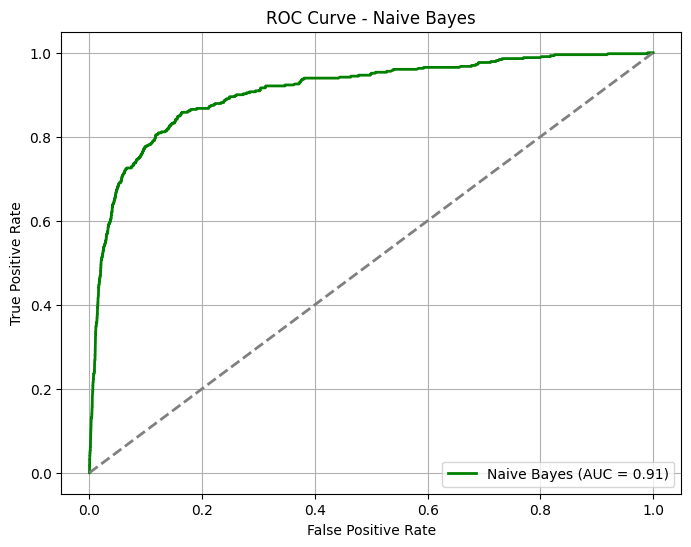

In [ ]:
# ROC para Bayes
from sklearn.metrics import roc_curve, auc
y_prob_bayes = clf.predict_proba(X_test_scaled)[:, 1]
fpr_bayes, tpr_bayes, _ = roc_curve(y_test, y_prob_bayes)
roc_auc_bayes = auc(fpr_bayes, tpr_bayes)

plt.figure(figsize=(8,6))
plt.plot(fpr_bayes, tpr_bayes, color='green', lw=2, label='Naive Bayes (AUC = %0.2f)' % roc_auc_bayes)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Naive Bayes')
plt.legend(loc="lower right")
plt.grid()
plt.show()

La curva ROC del modelo Naive Bayes muestra un desempeño general bastante sólido, con un AUC de 0.91, lo que indica una buena capacidad para distinguir entre tornados que causan muertes y los que no. La curva se eleva rápidamente hacia la esquina superior izquierda, lo cual es deseable, ya que sugiere una alta tasa de verdaderos positivos frente a una baja tasa de falsos positivos.

Sin embargo, al analizar en conjunto con las métricas de desempeño:

- Accuracy: 0.9363
- Precision: 0.3100
- Recall: 0.6907
- F1-score: 0.4280

vemos que, aunque el modelo logra detectar correctamente casi el 69% de los casos de muerte (recall), su precisión es baja (31%), lo que implica que comete muchos falsos positivos. Esto es menos preocupante en este contexto, ya que es preferible activar una alerta innecesaria que ignorar un tornado mortal.

No obstante, es importante señalar que el 31% de precisión también implica que el 69% de las alertas serán falsas, lo que puede generar desgaste institucional o desconfianza si se traduce en acciones preventivas costosas o alarmistas. Además, aunque el recall es bueno, todavía se escapan casi un tercio de las muertes reales, lo cual representa un riesgo crítico.

In [ ]:
# Verificar desbalance en la variable objetivo 'mortality'
print("Distribución original de la variable 'mortality':")
print(y.value_counts())
print("\nProporciones:")
print(y.value_counts(normalize=True).rename("proportion"))

Distribución original de la variable 'mortality':
mortality
0    40083
1     1434
Name: count, dtype: int64

Proporciones:
mortality
0    0.96546
1    0.03454
Name: proportion, dtype: float64


Al analizar la distribución de la variable objetivo mortality, se observa un fuerte desbalance entre clases: aproximadamente el 96.5 % de los eventos corresponden a tornados sin muertes (mortality = 0) y solo el 3.5 % a tornados con muertes (mortality = 1). Este desequilibrio puede inducir a los modelos de clasificación a favorecer la clase mayoritaria, obteniendo una aparente alta precisión (accuracy), pero con un pobre desempeño en la detección de los casos más críticos: los tornados que generan víctimas fatales.
Por esta razón, se aplicó SMOTE exclusivamente al conjunto de entrenamiento, generando instancias sintéticas de la clase minoritaria. Con esta estrategia se espera que el modelo aprenda patrones más representativos de los eventos mortales, mejorando así su capacidad para detectar correctamente dichos casos sin alterar la integridad del conjunto de prueba.

## Naive Bayes Balanceado con SMOTE

In [ ]:
import time
import pandas as pd
from sklearn.naive_bayes import BernoulliNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, confusion_matrix, classification_report
)
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# 1. Repetimos la separación si no está hecha
X = df_ml.drop('mortality', axis=1)
y = df_ml['mortality']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=101, stratify=y
)

# 2. Aplicar SMOTE solo al conjunto de entrenamiento
sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

print("Distribución después de SMOTE:")
print(y_train_sm.value_counts(normalize=True))

# 3. Escalar los datos
scaler = StandardScaler()
X_train_sm_scaled = scaler.fit_transform(X_train_sm)
X_test_scaled = scaler.transform(X_test)

# 4. Entrenar modelo con cronómetro ⏱️
start_time = time.time()
model = BernoulliNB()
model.fit(X_train_sm_scaled, y_train_sm)
tiempo_entrenamiento = time.time() - start_time

# 5. Predecir sobre el conjunto de prueba (sin SMOTE)
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]

# 6. Evaluar resultados
print("\n🔍 Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Matriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("\n📋 Reporte de clasificación:\n", classification_report(y_test, y_pred))

# 7. Guardar métricas en DataFrame
resultados_bayes_smote = pd.DataFrame({
    'Modelo': ['Naive Bayes (con SMOTE)'],
    'Accuracy': [round(accuracy_score(y_test, y_pred), 4)],
    'Precision': [round(precision_score(y_test, y_pred), 4)],
    'Recall': [round(recall_score(y_test, y_pred), 4)],
    'F1-score': [round(f1_score(y_test, y_pred), 4)],
    'AUC': [round(roc_auc_score(y_test, y_prob), 4)],
    'CPU time (s)': [round(tiempo_entrenamiento, 4)]
})

# 8. Mostrar resultados
display(resultados_bayes_smote)

Distribución después de SMOTE:
mortality
0    0.5
1    0.5
Name: proportion, dtype: float64

🔍 Accuracy: 0.9094412331406551

📊 Matriz de confusión:
 [[11044   982]
 [  146   284]]

📋 Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.99      0.92      0.95     12026
           1       0.22      0.66      0.33       430

    accuracy                           0.91     12456
   macro avg       0.61      0.79      0.64     12456
weighted avg       0.96      0.91      0.93     12456



,Modelo,Accuracy,Precision,Recall,F1-score,AUC,CPU time (s)
0,Naive Bayes (con SMOTE),0.9094,0.2243,0.6605,0.3349,0.8918,0.0426


Al aplicar SMOTE para balancear las clases, el modelo mejora levemente en recall, pero sufre una fuerte caída en precisión. El resultado es un F1-score menor al del modelo original. Dado que la ganancia en detección de positivos no compensa la pérdida de precisión, esta versión no supera al Naive Bayes sin SMOTE. Se generan demasiados falsos positivos, lo cual puede ser problemático en escenarios donde las alertas falsas tienen un costo.



## Aplicación de Algoritmos de Optimización 


### Partial_fit() para entrenamiento por lotes.

In [ ]:
import time
import numpy as np
import pandas as pd
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, confusion_matrix, classification_report
)

# Reinstanciar el modelo
nb_partial = BernoulliNB()

# Medir el tiempo de entrenamiento
start_time = time.time()
nb_partial.partial_fit(X_train_scaled, y_train, classes=np.unique(y))
tiempo_entrenamiento = time.time() - start_time

# Predecir
y_pred_partial = nb_partial.predict(X_test_scaled)
y_prob_partial = nb_partial.predict_proba(X_test_scaled)[:, 1]

# Evaluar
print("🔧 Accuracy (con partial_fit):", accuracy_score(y_test, y_pred_partial))
print("\n📊 Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_partial))
print("\n📋 Reporte de Clasificación:\n", classification_report(y_test, y_pred_partial))

# Guardar resultados en DataFrame
resultados_bayes_partial = pd.DataFrame({
    'Modelo': ['Naive Bayes (partial_fit)'],
    'Accuracy': [round(accuracy_score(y_test, y_pred_partial), 4)],
    'Precision': [round(precision_score(y_test, y_pred_partial), 4)],
    'Recall': [round(recall_score(y_test, y_pred_partial), 4)],
    'F1-score': [round(f1_score(y_test, y_pred_partial), 4)],
    'AUC': [round(roc_auc_score(y_test, y_prob_partial), 4)],
    'CPU time (s)': [round(tiempo_entrenamiento, 4)]
})

# Mostrar
display(resultados_bayes_partial)

🔧 Accuracy (con partial_fit): 0.9678869621066153

📊 Matriz de Confusión:
 [[11890   136]
 [  264   166]]

📋 Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98     12026
           1       0.55      0.39      0.45       430

    accuracy                           0.97     12456
   macro avg       0.76      0.69      0.72     12456
weighted avg       0.96      0.97      0.97     12456



,Modelo,Accuracy,Precision,Recall,F1-score,AUC,CPU time (s)
0,Naive Bayes (partial_fit),0.9679,0.5497,0.386,0.4536,0.8887,0.022


Para este caso específico, no se justifica el uso de partial_fit() en términos de eficiencia, ya que la carga computacional no es suficientemente alta como para que el entrenamiento por lotes tenga impacto. No obstante, esta técnica puede resultar útil en escenarios futuros donde se disponga de datos en streaming o conjuntos de entrenamiento que no pueden cargarse completamente en memoria.